<img src="logoD.png" alt="Logo MUII" align="right">

<br><br>
<a id="principio"></a> 
## Práctica 3

# Análisis de opinión a partir de texto


<br>
<div style="text-align: right">
Luis de la Ossa
<br>
Master Universitario en Ingeniería Informática
<br>
Universidad de Castilla-La Mancha

</div>

<h3><strong>José María García García</strong></h3>


--- 

# Introducción

<br>
El _Procesamiento de Lenguaje Natural_ es un area de las ciencias de la computación cuyo objetivo es el diseño de programas capaces de entender el lenguaje humano. Esta tarea es difícil ya que, en muchos casos, implica el análisis de texto a distintos niveles, y el uso de información de contexto. Sin embargo, para la resolución muchos problemas de ciencia de datos, como por ejemplo la predicción o la clasificación, no es necesaria una comprensión total del lenguaje, y se pueden utilizar modelos más sencillos.

En esta práctica, se construirá un modelo de clasificación a partir de 50000 comentarios sobre películas subidos a _Internet Movie DataBase_, y que están almacenados en archivos de texto. Éste ha de predecir con cierta tasa de acierto si un nuevo comentario es positivo o negativo.

Para poder entrenar un clasificador a partir de un conjunto de documentos de texto es necesario representar estos datos en una matriz bidimensional. En el modelo _Bag of Words_, cada documento se representa como el conjunto de palabras que aparecen en él. Después, como paso previo a la construcción de la matriz de datos, se elabora un vocabulario o lista con todos los términos que aparecen en algún documento. Una vez hecho esto, se construye una matriz, en la que cada fila representa un documento, y cada columna (cada característica) corresponde a un término. 

En la versión más básica, cada posición ${(d,t)}$ de la matriz contiene el valor para la medida ___Term Frequency___ (frecuencia de términos), que se denota $tf_{d,t}$, y refleja al número de veces que aprece el término $t$ en el documento $d$.

<br> 
Por ejemplo, dados estos tres documentos:

* Documento 1: "El objetivo de esta práctica es explicar el procesamiento básico de texto libre"
* Documento 2: "Uno de los enfoques es la bolsa de palabras"
* Documento 3: "Procesamiento de texto mediante bolsa de palabras"

la medida _Term Frequency_   generaría esta matriz de datos:

<br>
$$
X = \left[ \begin{array}{c | c | c | c | c | c | c }
El  & objetivo & de & esta & \cdots & bolsa & palabras \\
2 & 1 & 2 & 1 & \cdots & 0 & 0\\
0 & 0 & 2 & 0 & \cdots & 1 & 1\\
0 & 0 & 2 & 0 & \cdots & 1 & 1\\
\end{array}  \right] \begin{array}{c}
\\
Documento \, 1 \\
Documento \, 2 \\
Documento \, 3 \\
\end{array}
$$
<br>

En la matriz, $tf_{0,1}=2$ por que la palabra de índice $0$, "El", aparece dos veces en el documento $1$. 

Existen algunas variantes de esta medida, de modo que la matriz de datos se puede formar con:

* $tf_{d,t} \in \{0,1\}$ - Es decir, si el término aparece o no en el documento.
* $log(1+tf_{d,t})$ - Escala logarítmica.
* $tf_{d,t}/max_j \, tf_{d,t}$ - Escala en relación al término más frecuente en el documento.


<br>
La frecuencia de términos tiende a dispararse en el caso de palabras muy comunes como "el", "a", "de", etc. La métrica ___Inverse Document Frequency___ (frecuencia inversa en documentos) penaliza los términos en proporción a la frecuencia con que aparecen en el conjunto de documentos. La frequencia inversa de un término se formula como:

$$
idf_t = log\left(\frac{\# \,documentos}{\# \,documentos \, que \, incluyen \, la \, palabra \, t }\right)
$$

En el ejemplo anterior:

* $ idf_{el} = log\left(\frac{3}{1}\right) = 1.098 $
* $idf_{objetivo} = log\left(\frac{3}{1}\right) = 1.098$
* $idf_{de} = log\left(\frac{3}{3}\right) = 1$
* $idf_{esta} = log\left(\frac{3}{1}\right) = 1.098$
* $idf_{bolsa} = log\left(\frac{3}{2}\right) = 0.405$
* $idf_{palabras} = log\left(\frac{3}{2}\right) = 0.405$

<br>
Existen algunas formulaciones alternativas como:

$$
idf_t = log\left(\frac{1 + \# \,documentos}{1 + \# \,documentos \, que \, incluyen \, la \, palabra \, t }\right) + 1
$$

<br>

Por último, lo más habitual es utilizar una combinación de estas métricas, denominada ___Term Frequency Inverse Document Frequency___ que se formula como:

$$
tfidf_{d,t} = tf_{d,t} \times idf_t
$$

Dados los documentos anteriores, la matriz con los valores $tfidf_{d,t}$ sería:

$$
X = \left[ \begin{array}{c | c | c | c | c | c | c }
El  & objetivo & de & esta & \cdots & bolsa & palabras \\
2.2 & 1.1 & 2.2 & 1.1 & \cdots & 0 & 0\\
0 & 0 & 2.2 & 0 & \cdots & 0.81 & 0.81\\
0 & 0 & 2.2 & 0 & \cdots & 0.81 & 0.81\\
\end{array}  \right] \begin{array}{c}
\\
Documento \, 1 \\
Documento \, 2 \\
Documento \, 3 \\
\end{array}
$$

<br>

Una vez se dispone de la matriz de datos, y puesto que también se cuenta con un conjunto de revisiones clasificadas (aprendizaje supervisado), es posible construir el modelo de clasificación. Éste dependerá de la representación utilizada. Así, si se usa $tfidf_{d,t}$ se pueden utilizar métodos como la regresión logística o las máquinas de vectores de soporte. En el caso de utilizar la aparición o no de cada término en la posición $(d,t)$ de la matriz, se pueden utilizar métodos como NaiveBayes Multinomial.

<br>
Éste es el modelo más básico de análisis de sentimiento, pero existen modelos más complejos y refinados. Además, en muchos casos la diferencia en resultados no se debe solo al clasificador elegido, sino del preprocesamiento que se haga de los textos o a otros factores como el uso de _n-gramas_ o _POS tagging_. En este trabajo haremos un preprocesamiento sencillo, consistente en eliminar etiquetas HTML, caractéres no alfabéticos, y reducir las palabras a su raíz.

---

<br>
### Entrega

Esta práctica consta de 15 ejercicios de programación, que hay que resover por orden, y a través de los cuales ser llevará a cabo la implementación y estudio completo. Se valorará la experimentación y estudio adicional de técnicas como un trabajo optativo, que puede sumar hasta un punto en la evaluación final. 

---

<br>
# 1. Recogida de datos

<br>
La carpeta `aclImdb` [(descarga)](http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz) contiene 50000 archivos de texto con comentarios sobre películas organizados en dos subcarpetas, denominadas `train` y `test`, y  que corresponden, respectivamente, los datos de entrenamiento y test. A su vez, cada una de estas carpetas, contiene una subcarpeta denominada `pos`, con las revisiones positivas, y otra denominada `neg`, con las negativas. 


<br>
<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> (Solucionado)</font> Recoger todos los datos y almacenarlos en un formato adecuado para su posterior análisis. Para ello, se creará un objeto _DataFrame_ que guardará temporalmente las revisiones de la carpeta `train`, y que ha de tener dos columnas: la primera, denominada _review_, contendrá el texto con la revisión;  mientras que la segunda, denominada '_sentiment_' contendrá la valoración de la revisión, y podrá ser $1$ (positiva) o $0$ (negativa). Una vez construído el _DataFrame_, se exportará a un archivo `.csv`, que se ha de denominar `datos_peliculas_train.csv`. Posteriormente, se procederá de manera similar para las revisiones que se encuentran en la carpeta `test`, que se guardarán en el archivo `datos_peliculas_test.csv`.


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
El código tarda unos minutos, por lo que es conveniente utilizar una barra de progreso. Para ello es necesario instalar el paquete `progressbar2`, ya que `progressbar` no funciona con Python 3.x. Desde el código, no obstante, se importa `progressbar`. 
</div>

Procesar miles de documentos requiere tiempo. Debido a esto, es conveniente utilizar un subconjunto durante la implementación y pruebas. La variable `num_docs`, definida a continuación, fija el tamaño de entrenamiento y test con el que trabajar. El máximo valor que puede tomar es 25000. Pero se recomienda comenzar con 5000.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

# Tamaño del subconjunto de documentos con el que se va a trabajar.
# Se tomarán num_docs para training/validadación y num_docs para test.
num_docs = 5000 

In [ ]:
#!pip install progressbar2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
'''import time
import progressbar
import os

# Crea una barra de progreso
pBar = progressbar.ProgressBar(max_value=50000)

# En numpy y scikit-learn los datos se representan con valores
# numéricos, y hay que traducirlos.
ind_clase ={'pos':1, 'neg':0}

# Recorre las carpetas correspondientes
step = 1
for conjunto in ('train', 'test'):
    df_tmp = pd.DataFrame()
    for clase in ('pos','neg'):
        # Abre la carpeta correspondiente
        path = '../aclImdb/%s/%s' % (conjunto, clase)
        # Para cada archivo
        for archivo in os.listdir(path):
            # Lo abre y extrae el texto
            # Añadimos encoding='utf8' para evitar un UnicodeDecodeError
            with open(os.path.join(path, archivo), 'r', encoding='utf8') as datos:
                txt = datos.read()
            # Almacena la fila en el dataframe
            df_tmp = df_tmp.append([[txt, ind_clase[clase]]], ignore_index=True)
            # Actualiza la barra de datos
            pBar.update(step)
            step+=1
            
    # Añade los nombres de las columnas
    df_tmp.columns = ['review', 'sentiment']
    #Escribe el dataframe en un archivo.
    df_tmp.to_csv(''.join(['./datos_peliculas_',conjunto,'.csv']), index=False, encoding='utf-8')
'''

<br>

---

## 2. Preparación de los datos

<br>
Una recogidos los datos y almacenados en un formato adecuado, se procederá a la creación de un conjunto de entrenamiento de tipo _Bag of Words_, en el que cada revisión se representará mediante una lista de términos y su clase. Para ello, en primer lugar han de limpiarse los datos, es decir, se han de eliminar las etiquetas HTML y los signos. Para ello, se han de crear sendas funciones. Después, se convertirá cada cadena de texto en una lista de términos relevantes.

<br>
### Eliminación de etiquetas HTML
<br>
En la mayoría de los casos, las etiquetas _HTML_ introducen información innecesaria en el modelo _bag of words_. Por ello, es conveniente eliminarlas. 

<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i></font>  Implementar una función, denominada `removeHTML()`, que acepte como parámetro una cadena de texto, elimine de la misma las etiquetas _HTML_, y devuelva la nueva cadena.  Esta función ha de apoyarse en el manejo de expresiones regulares.

In [3]:
import re

def removeHTML(text):
    #Elimina etiquetar html (cadenas que empiezan por '<', seguidas de caracteres que no sean '>' y acabadas en '>')
    text = re.sub('<[^>]*>', '', text)    
    return text

# Test
texto = 'Yo estudio en la <a href="http://www.uclm.es/">UCLM</a>'
print(removeHTML(texto))
#Yo estudio en la UCLM

Yo estudio en la UCLM


<br>

### Eliminación de caracteres no alfabéticos (excepto emoticonos)

<br>
Los caracteres no alfabéticos tampoco son relevantes en el modelo de bolsa de palabras. Sin embargo en este contexto, sí que lo son los emoticonos, que contienen información relevante con respecto a la valorción que se hace en los comentarios.


<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i></font> 
Implementar una función, denominada `clean()`, que acepte como parámetro una cadena de texto y elimine de la misma los caracteres que no correspondan a palabras, con excepción de los emoticonos. Para ello: primero ha de detectar y guardar los emoticonos; después, ha de eliminar los caracteres no alfanuméricos; y por último, ha de añadir al resultado los emoticonos detectados en el primer paso.


Es necesario utilizar expresiones regulares para implementar esta función. Consideraremos que los emoticonos se componen de tres partes: ojos, que puede ser uno de estos tres caracteres { `:` `;` `=` }, boca  que puede ser uno de estos cuatro {   `)` `(` `D` `P` }, y opcionalmente nariz { `-` }.  Se trata de construir una expresión regular que encuentre una sucesión de esos tres elementos. 

In [4]:
import re

def clean(text):
    # Guarda los emoticonos
    emoticons = re.findall('[:;=]-?[()DP]', text)
    #print(emoticons)
    # Elimina los caracteres que no son alfabéticos y quitamos tambien Ds y Ps que haya solas en el texto
    text = re.compile('[\W]|\d|[P\s]|[D\s]').sub(" ", text)
    #Quitamos espacios
    text = text.replace("  ", " ")
    #text = re.sub('\W+\d*\W*\d*', ' ', text)
    # Añade los emoticonos, pero eliminando '-'
    text = text + ' '.join(emoticons).replace('-','')
    # Devuelve el texto
    return text

texto = ' ... ¡Si llegué a la película a las 10:00 :D con muchaD ilusión (más o menos)!  ...  pero me fui bastante cabreado :('
print(clean(texto))
#   Si llegué a la película a las     con mucha ilusión más o menos     pero me fui bastante cabreado  :D :(

   Si llegué a la película a las     con mucha ilusión más o menos     pero me fui bastante cabreado  :D :(


<br>

### Elaboración de la lista de palabras relevantes.

<br>
El siguiente paso en el preprocesamiento de los textos consiste en elaborar las listas de palabras. Una opción consiste simplemente en dividir la cadena de texto con el método `split()` de la clase `String`. Sin embargo, es recomendable seguir algunos pasos adicionales. Por ejemplo, existen palabras denominadas _stopwords_ (preposiciones, etc.) que no proporcionan niguna información, por lo que es mejor eliminarlas.  

Para la implementación de esta parte, se va a usar la librería [nltk (Natural Language Toolkit)](http://www.nltk.org/). Esta librería se apoya en algunos archivos de datos, que han de ser descargados _solamente_ la primera vez que se usan. En concreto, se descargarán los archivos necesarios para hacer la división en palabras o "_tokens_", y las _stopwords_. En la siguiente celda de código se extrae la lista _stopwords_ en idioma inglés y se almacenan en la variable `stopwords_en`. 

Por otra parte, las cadenas de texto "gusta" y "gustó" son distintas, por lo que también se considerarían palabras distintas. Esto podría repercutir en una degradación del rendimiento del modelo. Existen dos técnicas que permiten agrupar las palabras por familias. La primera de ellas, denominada [_stemming_](https://es.wikipedia.org/wiki/Stemming), consiste en reducir cada palabra a su raíz. En el caso del ejemplo, devolvería "gust" para ambas palabras. La segunda técnica, denominada [_lematización_](https://es.wikipedia.org/wiki/Lematizaci%C3%B3n) consiste en reemplazar cada palabra por su lema que, en el caso del ejemplo,  es "gustar". Para esta práctica utilizaremos la primera de las técnicas. En concreto, utilizaremos el objeto `PorterStemmer()` del paquete `nltk.stem.porter`, que también es creado en la siguiente celda.

In [5]:
import nltk
from nltk.stem.porter import PorterStemmer

#Descargados
#nltk.download('punkt')            # Solo es necesario ejecutar estas líneas 
#nltk.download('stopwords')        # una vez para descargar los archivos.

stopwords_en = nltk.corpus.stopwords.words('english')   # Extrae las stop words en inglés
stemmer = PorterStemmer()                               # Crea el stemmer 

<br>
<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i></font>  Crear una función denominada `extractTerms()` que reciba como parámetro una cadena de caracteres, y que devuelva la lista de términos correspondiente, descartando _stop words_, y sustituyendo cada palabra por su raíz. 

__Nota__: La descomposición de cada cadena de caracteres en palabras puede hacerse mediante el método `split()` de la clase `String`. Sin embargo, es preferible utilizar la función `nltk.word_tokenize()`. 

<div class="alert alert-block alert-danger">
<i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
La función `PorterStemmer.stem()` devuelve excepciones en algunos casos. Parece que utilizando solamente 5000 casos (`num_docs=5000`), no hay problema. Sin embargo, sí que lo hay con casos que aparecen después. Por tanto, se recomienda comentar la línea correspondiente si se utiliza un número mayor de ejemplos. Como consecuencia de esto, observaréis que el vocabulario crece bastante (más del doble).  
</div>

In [6]:
def extractTerms(text):
    # Dividir en tokens y eliminar stopwords
    #-------------
    # Nos quedamos con los tokens del texto que no esten en stopwords_en
    word_list = [x for x in nltk.word_tokenize(text) if x not in stopwords_en]
    #-------------   
    # Obtiene la raíz de las palabras
    word_list = [stemmer.stem(word) for word in word_list] # Comentar para no usar PorterStemmer
    return word_list

text = "The goal of this text isn't to explain complex free text processing"
print(extractTerms(text))
# ['the', 'goal', 'text', "n't", 'explain', 'complex', 'free', 'text', 'process']

['the', 'goal', 'text', "n't", 'explain', 'complex', 'free', 'text', 'process']


<br>

### Preprocesamiento del conjunto de datos

Una vez implementadas las funciones, se procederá al preprocesamiento de los datos.

<br>

<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i></font>  Cargar los datos del archivo `./datos_peliculas_train.csv` en un _DataFrame_ denominado `df_reviews`, y procesarlos según el método descrito anteriormente, es decir, eliminación de etiquetas HTML y limpieza de caracteres no alfanuméricos (la descomposición en términos se hará después). Para ello, se aplicarán sucesivamente las funciones `removeHTML()` y `clean()` sobre el campo `review`.


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Es necesario desordenar los datos, ya que están ordenados por clase y, bien al seleccionar un subconjunto para pruebas, o posteriormente al dividir el conjunto en entrenamiento/validación, todos los casos correspondientes a una partición podrían corresponder a la misma clase.. 
</div>

In [7]:
#ESTABLECEMOS SEMILLA
np.random.seed(0)

# Lee los datos
df_reviews = pd.read_csv('./datos_peliculas_train.csv')
 
# Desordena los elementos porque están ordenados por clases
df_reviews = df_reviews.reindex(np.random.permutation(df_reviews.index))

# Extrae el subconjunto con el que vamos a trabajar
df_reviews = df_reviews.iloc[:num_docs,:]

# Hace la limpieza (quita HTML y limpia los caractéres no alfanuméricos)
#-------------
df_reviews['review']= df_reviews['review'].apply(lambda text: clean(removeHTML(text)))
#-------------  
df_reviews

,review,sentiment
14149,Forbidden Siren is based upon the Siren layst...,0
8946,You better see this episode from the beginning...,1
22378,This is one of those movies that s trying to b...,0
12162,I have seen this film numerous times and for t...,1
4879,Let s face it the final season was one of th...,1
12710,There is an excellent reason Edison went strai...,0
24595,Boy this was one lousy movie While I haven t s...,0
308,House Of Games is definitely not without its ...,1
4343,A series of random seemingly insignificant the...,1
18230,There s enough star power in THE HOUSE OF S IR...,0


<br>

---

## 3. Creación de una matriz TF-IDF de entrenamiento.


<br>
Una vez se dispone de los datos, se procederá a construir un conjunto de entrenamiento a partir de la representación _Bag of Words_.  Para ello, se utilizará el objeto `TfidfVectorizer` del paquete `sklearn.feature_extraction.text`. El método `TfidfVectorizer.fit()`  recibe el conjunto de documentos, y genera un vocabulario con todos los términos que aparecen en él. Éste será almacenado en un campo, denominado `vocabulary_`, que es un diccionario en el que las claves corresponden a cada uno de los términos, y los valores a su índice. Por otra parte, y una vez creado el vocabulario, el método `TfidfVectorizer.transform()` recibe un conjunto de documentos, y genera la matriz de datos en la que la posición $(d,t)$ contiene el valor $tfidf_{d,t}$. En este caso, en el que se van a usar los mismos datos para instanciar el objeto y para crear la matriz, se puede llamar directamente al método `TfidfVectorizer.fit_transform()`, lo que equivale a llamar secuencialmente a los dos anteriores.


El objeto `TfidfVectorizer` acepta un parámetro, `tokenizer`, en el que se le puede pasar una función para llevar a cabo la descomposición de la cadena de caracteres en términos. En este caso, se pasará la función `extractTerms()` implementada anteriormente. 

<br>
<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i></font> Construir un objeto de la clase `TfidfVectorizer` y denominarlo  `tfidf_vect`. Transformar la columna `review` en un una matriz de datos que será almacenada en una variable, denominada `reviews_tfidf`. Imprimir el tamaño del vocabulario.

<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
La construcción del vocabulario y posterior generación de la matriz requiere unos minutos.
</div>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Construye el objeto TfidfVectorizer
#-------------
tfidf_vect = TfidfVectorizer(tokenizer=extractTerms)
#-------------  

# Genera la matriz de datos
#-------------
tfidf_reviews = tfidf_vect.fit_transform(df_reviews['review'])
#-------------  
print("El tamaño del vocabulario es: ", len(tfidf_vect.vocabulary_))
#Para seed = 0
# Para num_docs = 5000
# El tamaño del vocabulario es:  26634 
# Para num_docs = 25000
# El tamaño del vocabulario es:  51907 

El tamaño del vocabulario es:  26634


<br>
<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i></font>  Almacenar el contenido la variable `tfidf_reviews` en una variable denominada `X`, que contendrá los datos de entrada para el entrenamiento del modelo. Obtener también los valores del campo `sentiment` del _DataFrame_ `df_review` y almacenarlos en la variable `y`.

Una vez se dispone del conjunto de datos, y en aras a hacer un ajuste de los parámetros del modelo, se dividirá en dos partes. El 80% de los datos se utilizarán para entrenamiento, y las variables de entrada y salida se guardarán, respectivamente, en las variables `X_train` e `y_train`. El resto de datos, que se dedicará a la validación, se guardará en las variables `X_val` e `y_val`. Para hacer la partición, se puede utilizar el método `train_test_split`, del módulo `model_selection`.

In [9]:
from sklearn.model_selection import train_test_split

# Obtiene los valores de training y test
X = tfidf_reviews
y = df_reviews['sentiment']

# Genera las particiones (solo hace falta establecer el tamaño de train o test en train_test_split, 
#el otro valor es complementario) 
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

<br>

---

## 4. Aprendizaje de un modelo de regresión logística.


<br>
<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Aprender un modelo de regresión logística, que se ha de guardar en la variable `lr_model`, con los datos de entrenamiento (`X_train`, `y_train`). Reportar el acierto sobre ese conjunto de entrenamiento, y sobre el conjunto de validación (`X_val`, `y_val`). Se fijará el parámetro $C=1$ (la inversa de la regularización).



In [10]:
from sklearn.linear_model import LogisticRegression

# Crea y entrena el modelo
#-------------
# C = 1 por defecto en el constructor LogisticRegression() 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
#------------- 

print(" Acierto (entrenamiento): ", lr_model.score(X_train,y_train))
print(" Acierto (validación): ", lr_model.score(X_val,y_val))
# Para num_docs = 5000
# Acierto (entrenamiento):  0.9485
# Acierto (validación):  0.845
# Para num_docs = 25000
# Acierto (entrenamiento):  0.9314
# Acierto (validación):  0.884

 Acierto (entrenamiento):  0.9485
 Acierto (validación):  0.845



<br>
### Ajuste del parámetro de regularización mediante selección de modelos

<br>
<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> En el apartado anterior se ha utilizado un valor arbitrario para el parámetro `C`. Implementar manualmente el método de selección de modelos visto en clase y determinar el valor óptimo para el parámetro de regularización. Probar valores desde 1e-5 a 1e5. Guardar el valor en la variable `C_b`.

In [11]:
c_range = np.logspace(-5, 5, 11)
best_score = 0
C_b = 0
for C in c_range:
    lr_model.set_params(C=C)
    #-------------
    lr_model.fit(X_train, y_train)
    train_score, val_score = lr_model.score(X_train,y_train), lr_model.score(X_val,y_val)
    if(best_score < val_score):
        C_b = C
        best_score = val_score
    #------------- 
    print("C=%e \t Entrenamiento %.3f / Validación %.3f " %  (C, train_score, val_score))


'''
Para num_docs = 5000
C=1.000000e-05 	 Entrenamiento 0.668 / Validación 0.619 
C=1.000000e-04 	 Entrenamiento 0.696 / Validación 0.649 
C=1.000000e-03 	 Entrenamiento 0.819 / Validación 0.764 
C=1.000000e-02 	 Entrenamiento 0.851 / Validación 0.818 
C=1.000000e-01 	 Entrenamiento 0.881 / Validación 0.830 
C=1.000000e+00 	 Entrenamiento 0.949 / Validación 0.845 
C=1.000000e+01 	 Entrenamiento 0.999 / Validación 0.843 
C=1.000000e+02 	 Entrenamiento 1.000 / Validación 0.835 
C=1.000000e+03 	 Entrenamiento 1.000 / Validación 0.833 
C=1.000000e+04 	 Entrenamiento 1.000 / Validación 0.831 
C=1.000000e+05 	 Entrenamiento 1.000 / Validación 0.826 

El valor óptimo para el parámetro de regularización es:  1.0

Para num_docs = 25000
C=1.000000e-05 	 Entrenamiento 0.503 / Validación 0.486 
C=1.000000e-04 	 Entrenamiento 0.503 / Validación 0.487 
C=1.000000e-03 	 Entrenamiento 0.756 / Validación 0.729 
C=1.000000e-02 	 Entrenamiento 0.837 / Validación 0.822 
C=1.000000e-01 	 Entrenamiento 0.878 / Validación 0.862 
C=1.000000e+00 	 Entrenamiento 0.931 / Validación 0.884 
C=1.000000e+01 	 Entrenamiento 0.985 / Validación 0.887 
C=1.000000e+02 	 Entrenamiento 1.000 / Validación 0.874 
C=1.000000e+03 	 Entrenamiento 1.000 / Validación 0.867 
C=1.000000e+04 	 Entrenamiento 1.000 / Validación 0.865 
C=1.000000e+05 	 Entrenamiento 1.000 / Validación 0.860 

El valor óptimo para el parámetro de regularización es:  10.0
'''
print("\nEl valor óptimo para el parámetro de regularización es: ", C_b)

C=1.000000e-05 	 Entrenamiento 0.668 / Validación 0.619 
C=1.000000e-04 	 Entrenamiento 0.696 / Validación 0.649 
C=1.000000e-03 	 Entrenamiento 0.819 / Validación 0.764 
C=1.000000e-02 	 Entrenamiento 0.851 / Validación 0.818 
C=1.000000e-01 	 Entrenamiento 0.881 / Validación 0.830 
C=1.000000e+00 	 Entrenamiento 0.949 / Validación 0.845 
C=1.000000e+01 	 Entrenamiento 0.999 / Validación 0.843 
C=1.000000e+02 	 Entrenamiento 1.000 / Validación 0.835 
C=1.000000e+03 	 Entrenamiento 1.000 / Validación 0.833 
C=1.000000e+04 	 Entrenamiento 1.000 / Validación 0.831 
C=1.000000e+05 	 Entrenamiento 1.000 / Validación 0.826 

El valor óptimo para el parámetro de regularización es:  1.0


---

## 5. Validación del modelo



### Curva de aprendizaje

Además de las tasas de acierto y error, es conveniente explorar la curva de aprendizaje para tener una visión del comportamiento del algoritmo. En concreto, es posible ver si el tamaño del conjunto de datos es suficientemente grande, o incluso se ha llegado a un punto en el que añadir más datos no aporta una mejora.

<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Obtener los datos relativos a la curva de aprendizaje del método anterior, con el valor óptimo de regularización. Utilizar el método `learning_curve()` del paquete `model_selection`, y tamaños del 10% al 100% del conjunto de entrenamiento, y 5-validación cruzada. Almacenar la media de acierto sobre entrenamiento en las 5 ejecuciones correspondientes a cada tamaño en el vector `train_scores_mean`, y la desviación en `train_scores_std`. Hacer lo propio con los errores de test, cuya media se almacenará en `test_scores_mean` y su desviación en `test_scores_std`.


In [12]:
from sklearn.model_selection import learning_curve
 
lr_model.set_params(C=C_b)

# Tamaños
sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1])

# Obtiene los datos de la curva de aprendizaje
#-------------
train_sizes, train_scores, test_scores = learning_curve(lr_model, X, y, train_sizes=sizes, cv=5)
#------------- 

# Calcula las estadísticas.
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

El siguiente código imprime la curva de aprendizaje. La sombra al lado de cada línea corresponde a la desviación estándar. Determinar si es conveniente añadir más datos.

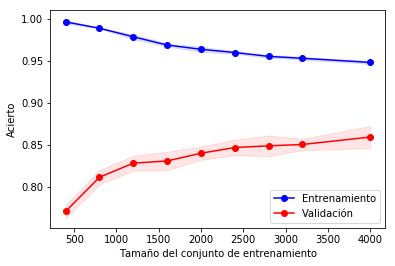

In [13]:
from matplotlib import pyplot as plt
% matplotlib inline

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Acierto")
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Validación")
plt.legend(loc=4, fontsize=10)
plt.show()

En principio (para un número de documentos de 5000), ambas rectas muestran una tendencia a converger en una tasa de acierto que supera el 90% (la tasa de acierto con el conjunto de entrenamiento decrece más despacio de lo que la tasa de acierto con el conjunto de validación crece). Aunque la varianza no presenta un valor muy alto, sabemos que aumentar el tamaño del conjunto de datos llevará a que este disminuya, evitando tambien que se produzcan sobreajustes. <br/>

Si aumentamos el tamaño de la muestra, puede que el error de entrenamiento crezca, pero el de validación disminuirá, y esto es lo que buscamos al entrenar un modelo. Si probamos a duplicar el tamaño de los conjuntos de entrenamiento (`num_docs = 10000`), confirmamos que <strong>la tasa de acierto aumenta</strong>, además sin apreciarse penalización en la tasa de entrenamiento.
<img src="./curve10000.png">

### Evaluación  del modelo

<br>
El rendimiento real del modelo ha de ser evaluado con datos no utilizados en el proceso de aprendizaje o validación. Para reportar el rendimiento final del modelo, cargaremos los datos del archivo `datos_peliculas_test.csv` en un _DataFrame_ denominado `df_new_reviews`. Después, con el fin de poder utilizar el modelo de clasificación, es necesario someter los nuevos comentarios al mismo proceso de limpiado y preprocesado, es decir, eliminación de HTML, elminación de caracteres no alfanuméricos, y conversión en lista de términos. En este último paso, es necesario utilizar el mismo objeto `TfidfVectorizer` creado para el entrenamiento del modelo para producir la matriz de datos `tfidf_test`. Por último, se copiará esa matriz de datos en la variable `X_test` (esto es por claridad en la notación, no haría falta), y se obtendrán los valores del campo `sentiment` de `df_new_reviews`, que se almacenarán en la variable `y_test`.


<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Preprocesar el conjunto de test, entrenar el modelo de regresión logística con los datos de entrenamieneto y el parámetro óptimo de regularización, y reportar el rendimiento del modelo sobre nuevos comentarios.

In [14]:
# Aprende el modelo con el parámetro óptimo de regularización
lr_model.set_params(C=C_b)
lr_model.fit(X_train,y_train)

# Lee los datos de test
df_new_reviews = pd.read_csv('./datos_peliculas_test.csv')
# Desordena los elementos porque están ordenados por clases.
df_new_reviews = df_new_reviews.reindex(np.random.permutation(df_new_reviews.index))
# Toma el subconjunto con el que trabajamos
df_new_reviews = df_new_reviews.iloc[:num_docs,:]
# Los limpia
#-------------
df_new_reviews['review'] = df_new_reviews['review'].apply(lambda text: clean(removeHTML(text)))
df_new_reviews

,review,sentiment
1562,eople say that this film is a typical teen ho...,1
16858,This movie is very bad In fact the only reason...,0
5951,I went to the cinema in when the film was re...,1
24623,The Calu what now Yeah I thought it was a stup...,0
3742,I loved this movie My daughter is and a cou...,1
10200,Watching some of the sequences err the entire ...,1
14882,This is a serious film about black revolutiona...,0
23572,But even caricatures need a plausible plot lin...,0
6620,Certainly this proves beyond a shadow of doubt...,1
12674,There are a whole lot of movies primarily from...,0


In [15]:
#------------- 
# Extrae los términos 
#-------------
tfidf_vect.fit(df_reviews['review'])
tfidf_test = tfidf_vect.transform(df_new_reviews['review'])
#--------------
# Crea el conjunto de entrenamiento y test
X_test = tfidf_test
y_test = df_new_reviews['sentiment']

# Clasifica
print("La tasa de acierto (test) es: ", lr_model.score(X_test,y_test))
# Para num_docs = 5000
# La tasa de acierto (test) es:  0.8536
# Para num_docs = 25000
# La tasa de acierto (test) es:  0.86856

La tasa de acierto (test) es:  0.8536


<br>
El ejercicio anterior devuelve la tasa de acierto, que indica la probabilidad de clasificar correctamente una revisión. Sin embargo, si se quiere hacer una valoración global sobre la tasa de comentarios positivos, y asumiento que el error se distribuye independientemente de la clase, es posible obtener algo  más de precisión.


<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Obtener la matriz de confusión, reportar la proporción de comentarios positivos real en test, y la proporción de comentarios positivos detectada.

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = lr_model.predict(X_test)

# Obtiene la matriz de confusión.
#-------------
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])
#-------------

# Obtiene la proporción real de comentarios positivos, 
# y la proporción etiquetados.
#-------------
#Numero de comentarios positivos/Numero total de comentarios
prop_real = y_test.value_counts()[1]/len(y_test)
#Numero de comentarios etiquetados como positivos / Numero total de comentarios
prop_etiqutados = np.sum(cm[1,:])/len(y_pred)
#-------------

'''
Para num_docs = 5000
Matriz de confusión: 
 [[2139  392]
 [ 340 2129]]
Proporción de comentarios positivos: 0.49
Proporción de comentarios positivos etiquetados: 0.49

Para num_docs = 25000
Matriz de confusión: 
 [[11028  1472]
 [ 1814 10686]]
Proporción de comentarios positivos: 0.50
Proporción de comentarios positivos etiquetados: 0.49
'''
print("Matriz de confusión: \n", cm)
print('Proporción de comentarios positivos: %.2f'% (prop_real))
print('Proporción de comentarios positivos etiquetados: %.2f'% (prop_etiqutados))

Matriz de confusión: 
 [[2139  392]
 [ 340 2129]]
Proporción de comentarios positivos: 0.49
Proporción de comentarios positivos etiquetados: 0.49


### Evaluación sobre otros datos

<br>
Es interesante estudiar cual es el rendimiento del modelo en un contexto distinto del de las revisiones de películas. Para ello, se va a obtener la tasa de acierto sobre un conjunto de revisiones de productos para niños en _Amazon_. Estos datos, que se almacenan en un archivo `.csv`, contienen dos columnas, denominadas `name` y `rating`, que son innecesarias y hay que eliminar. Además, la clase negativa se codifica con el valor $-1$, por lo que hay que reetiquetarla. Por último, se han de eliminar las columnas que tengan campos vacíos.


<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Obtener el rendimiento del modelo sobre esta base de datos.


In [18]:
df_amazon = pd.read_csv('../amazon_baby_subset.csv')
# Desordena los elementos porque están ordenados por clases.
df_amazon = df_amazon.reindex(np.random.permutation(df_amazon.index))


# Elimina las columnas innecesarias
#-------------
del df_amazon['name']
del df_amazon['rating']
#-------------

# Eliminar vacíos
df_amazon.dropna(inplace=True)

# Reetiqueta los valores de 'sentiment=-1' como 'sentiment=0'
#-------------
#Filtramos los registros que tienen la columna sentiment a -1 y lo igualamos a 0
df_amazon['sentiment'].loc[df_amazon['sentiment'] == -1] = 0
#-------------

# Extrae un subconjunto de documentos para trabajar.
df_amazon = df_amazon.iloc[:num_docs,:]

# Los limpia
#-------------
df_amazon['review'] = df_amazon['review'].apply(lambda text: clean(removeHTML(text)))
#-------------


# Extrae los términos 
#-------------
tfidf_amazon = tfidf_vect.transform(df_amazon['review'])
#-------------

# Crea el conjunto de entrenamiento y test
X_amazon = tfidf_amazon
y_amazon = df_amazon['sentiment'].values

# Clasifica
print("La tasa de acierto (test) es: ", lr_model.score(X_amazon,y_amazon))
# Para num_docs = 5000
# La tasa de acierto (test) es:  0.7324
# Para num_docs = 25000
# La tasa de acierto (test) es:  0.73232

La tasa de acierto (test) es:  0.7324


<br>

---

##  6.  Extracción de información del modelo


Además de la función de predicción, el regresión logística permite extraer cierta información con respecto al patrón que subyace en los datos. Así, el valor absoluto de un coeficiente $\theta_t$ refleja la importancia de ese coeficiente en la clasificación, de modo que si $\theta_t$ tiene un valor alto, eso quiere decir que el término  $t$ es determinante en la clasificación. 

La función `TfidfVectorizer.get_feature_names()` devuelve la lista ordenada de términos en el vocabulario del objeto `TfidfVectorizer`. Por tanto, para obtener las palabras tienen más incidencia en las revisiones, se han de obtener los coeficientes con mayor absoluto, y posteriormente extraer los términos de las posiciones correspondientes a esos coeficientes de la lista.

<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Obtener e imprimir los 30 términos más relevantes en la clasificación. ¿Tiene sentido la respuesta?

In [19]:
coefficients = lr_model.coef_.ravel()
ord_coefficients = np.argsort(np.abs(coefficients))
best_coefficients = ord_coefficients[-30:]

# Extrae la lista de términos 
terms = np.asarray(tfidf_vect.get_feature_names())

# Se queda con los más relevantes
#-------------
relevant_terms = terms[best_coefficients]

print(relevant_terms)
#Para num_docs = 5000
#['amaz' 'perform' 'horribl' 'crap' 'famili' 'fun' 'unfortun' 'favorit'
# 'script' 'wors' 'beauti' 'tri' 'well' 'best' 'perfect' 'enjoy' 'even'
# 'poor' 'stupid' 'terribl' 'minut' 'noth' 'aw' 'excel' 'love' 'wast'
# 'bore' 'great' 'worst' 'bad']
#Para num_docs = 25000
#['definit' 'oh' 'noth' 'perfectli' 'terribl' 'brilliant' 'annoy' 'enjoy'
# 'unfortun' 'bad' 'lack' 'highli' 'dull' 'horribl' 'favorit' 'best' 'fail'
# 'mess' 'save' 'poor' 'perfect' 'poorli' 'wors' 'disappoint' 'bore'
# 'great' 'excel' 'wast' 'aw' 'worst']

['amaz' 'perform' 'horribl' 'crap' 'famili' 'fun' 'unfortun' 'favorit'
 'script' 'wors' 'beauti' 'tri' 'well' 'best' 'perfect' 'enjoy' 'even'
 'poor' 'stupid' 'terribl' 'minut' 'noth' 'aw' 'excel' 'love' 'wast'
 'bore' 'great' 'worst' 'bad']


Es completamente lógico que los términos que más aporten al modelo sean **adjetivos** (amaz\*, raiz de amazing, amazed, fun, favorit\*, best, worst, bore\*, etc.) y **verbos** relativos a la expresión de emociones (love, enjoy).


<br>
Es posible mostrar las etiquetas más relevantes como una nube de palabras, utilizando el valor absoluto de los coeficientes como peso.

In [ ]:
#! pip install wordcloud

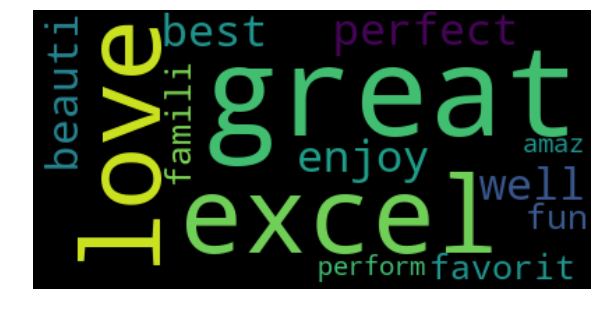

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Crea un diccionario con las palabras y sus scores (como enteros)
scores = (coefficients[best_coefficients]*100).astype(np.int)
tag_scores = dict(zip(relevant_terms,scores))

# Genera la nube de palabras
wordcloud = WordCloud().generate_from_frequencies(tag_scores)

# La muestra
fig = plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

<h3>Nube de palabras para 5000 documentos</h3>
<img src="./wordcloud_5000.png">

<br>

## 7. Creación de un modelo simple.

<br>
Es posible pasarle al objeto `TfidfVectorizer` un vocabulario, es decir un diccionario con pares `(término:posicion)`, de modo que solamente considere esos términos en la elaboración de la matriz tf-idf, ignorando los demás. 


<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Construir un vocabulario con los términos relevantes obtenidos anteriormente, y crear un objeto `TfidfVectorizer` denominado `tfidf_vect_short` que use dicho vocabulario. Generar después la matriz tfidf con los datos de las revisiones (las de _IMDB_) denominado `tfidf_reviews_short`, a partir del cual se obtiene la matriz con los datos de entrenamiento, denominada `X_train_short`. Aprender un nuevo modelo, denominado `lr_model_short`,  y reportar el resultado sobre test. 

In [21]:
# Crea el vocabulario.
new_vocabulary = {}
for position, word in enumerate(relevant_terms):
    new_vocabulary[word] = position
    
# Crea el nuevo objeto
#-------------
tfidf_vect_short = tfidf_vect_short = TfidfVectorizer(tokenizer=extractTerms, vocabulary=new_vocabulary)
#-------------   

# Crea la nueva matriz de datos.
#-------------
tfidf_reviews_short = tfidf_vect_short.fit_transform(df_reviews['review'])
#-------------   

# Extrae los datos y las clases
#-------------
X_train_short = tfidf_reviews_short
y_train_short = df_reviews['sentiment']
#-------------   


# Entrena el modelo
lr_model_short = LogisticRegression(C=1)
lr_model_short.fit(X_train_short,y_train_short)
print(" Acierto (entrenamiento): ", lr_model_short.score(X_train_short,y_train_short))


# Obtiene el conjunto de test. OJO! A partir de df_new_reviews
#-------------
tfidf_test_short = tfidf_vect_short.transform(df_new_reviews['review'])
#-------------  
X_test_short = tfidf_test_short
y_test_short = df_new_reviews['sentiment'].values

# Obtiene el error de test
print(" Acierto (test): ", lr_model_short.score(X_test_short,y_test_short))
# Para num_docs = 5000
# Acierto (entrenamiento):  0.7934
# Acierto (test):  0.7836
# Para num_docs = 25000
# Acierto (entrenamiento):  0.7894
# Acierto (test):  0.78468

 Acierto (entrenamiento):  0.7934
 Acierto (test):  0.7836


<br>
<font color="#004D7F" size=3> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Por último, probar este modelo reducido, `lr_model_short` con los datos de las revisiones de amazon. Para ello, utilizar el objeto `tfidf_vect_short` para transformar los datos, que serán almacenados en `X_amazon_short`. 

In [22]:
# Extrae los términos 
#-------------
# COMPLETAR
tfidf_amazon_short = tfidf_vect_short.transform(df_amazon['review'])
#-------------  
# Crea el conjunto de entrenamiento y test
X_amazon_short = tfidf_amazon_short
y_amazon_short = df_amazon['sentiment'].values

# Clasifica
print("La tasa de acierto sobre otros datos es: ", lr_model_short.score(X_amazon_short,y_amazon_short))
# Para num_docs = 5000
# La tasa de acierto sobre otros datos es:  0.6654
# Para num_docs = 25000
# La tasa de acierto sobre otros datos es:  0.6552

La tasa de acierto sobre otros datos es:  0.6654


<div style="text-align: right"> <font size=5> [<i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#990003">](#principio)</i></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#990003"></i> </font></div>